In [1]:
import tweepy
import seaborn as sbn

import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

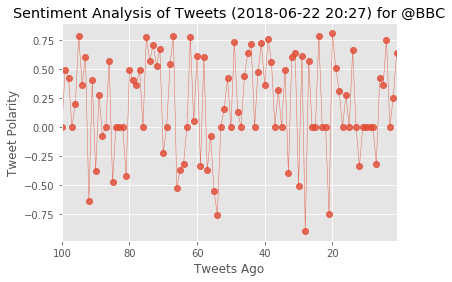

In [11]:
# Target Account
target_user = "@BBC"

# Counter
counter = 1

# Variables for holding sentiments
bbc_sentiments = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1, 6):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        bbc_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter += 1
bbc_sentiments_pd = pd.DataFrame.from_dict(bbc_sentiments)


bbc_sentiments_pd['Source']='@BBC' 

bbc_sentiments_pd.to_csv('bbc_sent_pd.csv', sep='\t')
# Create plot
x_vals = bbc_sentiments_pd["Tweets Ago"]
y_vals = bbc_sentiments_pd["Compound"]
plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user}")
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig('bbc_sent_plt.png')
plt.show()




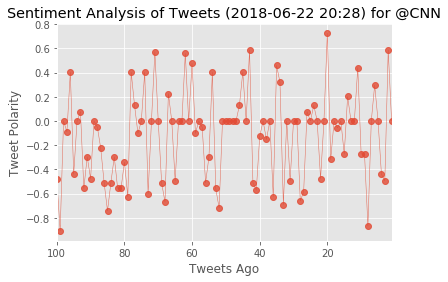

In [12]:
# Target Account
target_user = "@CNN"

# Counter
counter = 1

# Variables for holding sentiments
cnn_sentiments = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1,6):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        cnn_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter += 1
cnn_sentiments_pd = pd.DataFrame.from_dict(cnn_sentiments)
cnn_sentiments_pd['Source']='@CNN' 


cnn_sentiments_pd.to_csv('cnn_sent_pd.csv', sep='\t')
# Create plot
x_vals = cnn_sentiments_pd["Tweets Ago"]
y_vals = cnn_sentiments_pd["Compound"]
plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user}")
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig('cnn_sent_plt.png')
plt.show()




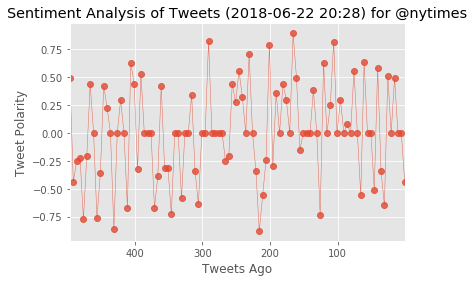

In [13]:
# Target Account
target_user = "@nytimes"

# Counter
counter = 1

# Variables for holding sentiments
nyt_sentiments = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1,6):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        nyt_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter += 5
 #NYT sentiments plot and output
nyt_sentiments_pd = pd.DataFrame.from_dict(nyt_sentiments)
nyt_sentiments_pd['Source']='@nytimes' 

nyt_sentiments_pd.to_csv('nyt_sent_pd.csv', sep='\t')   

# Create plot
x_vals = nyt_sentiments_pd["Tweets Ago"]
y_vals = nyt_sentiments_pd["Compound"]
plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user}")
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig('nyt_sent_plt.png')
plt.show()


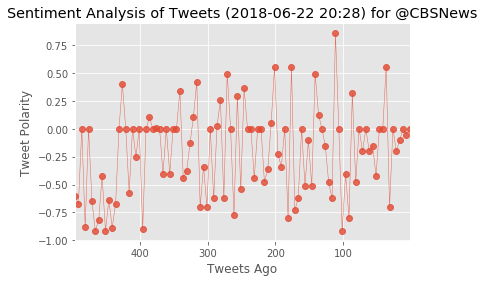

In [14]:
# Target Account
target_user = "@CBSNews"

# Counter
counter = 1

# Variables for holding sentiments
cbs_sentiments = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1,6):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        cbs_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter += 5
#CBS sentiments plot and output
cbs_sentiments_pd = pd.DataFrame.from_dict(cbs_sentiments)
cbs_sentiments_pd['Source']='@cbs' 


cbs_sentiments_pd.to_csv('cbs_sent_pd.csv', sep='\t')
# Create plot
x_vals = cbs_sentiments_pd["Tweets Ago"]
y_vals = cbs_sentiments_pd["Compound"]
plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user}")
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig('cbs_sent_plt.png')
plt.show()


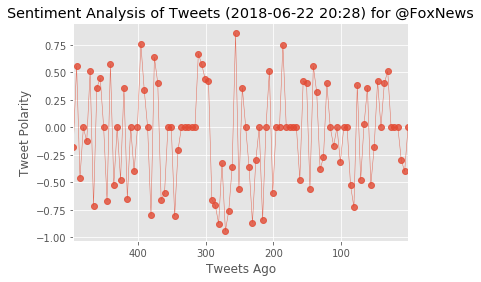

In [15]:
# Target Account
target_user = "@FoxNews"

# Counter
counter = 1

# Variables for holding sentiments
fox_sentiments = []

# Variable for max_id
oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(1,6):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user, max_id = oldest_tweet)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print Tweets
        # print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        # Get Tweet ID, subtract 1, and assign to oldest_tweet
        oldest_tweet = tweet['id'] - 1
        
        # Add sentiments for each tweet into a list
        fox_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter += 5
fox_sentiments_pd = pd.DataFrame.from_dict(fox_sentiments)
fox_sentiments_pd['Source']='@FoxNews'        

fox_sentiments_pd.to_csv('fox_sent_pd.csv', sep='\t')
# Create plot
x_vals = fox_sentiments_pd["Tweets Ago"]
y_vals = fox_sentiments_pd["Compound"]
plt.plot(x_vals,
         y_vals, marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Tweets ({now}) for {target_user}")
plt.xlim([x_vals.max(),x_vals.min()]) #Bonus
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig('fox_sent_plt.png')
plt.show()

        


In [16]:
combined_sent_df = pd.concat([fox_sentiments_pd, cbs_sentiments_pd,nyt_sentiments_pd,cnn_sentiments_pd,bbc_sentiments_pd])

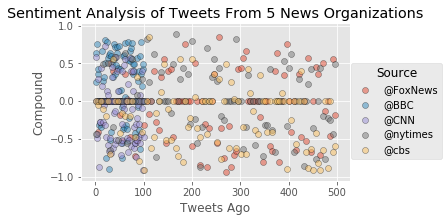

In [43]:
combined_sent_df = pd.concat([fox_sentiments_pd, cbs_sentiments_pd,nyt_sentiments_pd,cnn_sentiments_pd,bbc_sentiments_pd])
combined_sent_df.insert(0, 'New_ID', range(0, 0 + len(combined_sent_df)))
combined_sent_df=combined_sent_df.set_index('New_ID')
combined_sent_df=combined_sent_df.drop(combined_sent_df.index[0])
combined_sent_df.to_csv('combined_sent_df.csv', sep='\t')
# Create plot
_Source= ['@FoxNews', '@BBC', '@CNN', '@nytimes','@cbs']
fg = sbn.FacetGrid(data=combined_sent_df, hue='Source', hue_order=_Source, aspect=1.61)
fg.map(plt.scatter, 'Tweets Ago', 'Compound', alpha=.5,edgecolors= "black").add_legend()
plt.title("Sentiment Analysis of Tweets From 5 News Organizations")
plt.savefig('combined_sent_plt.png')
        


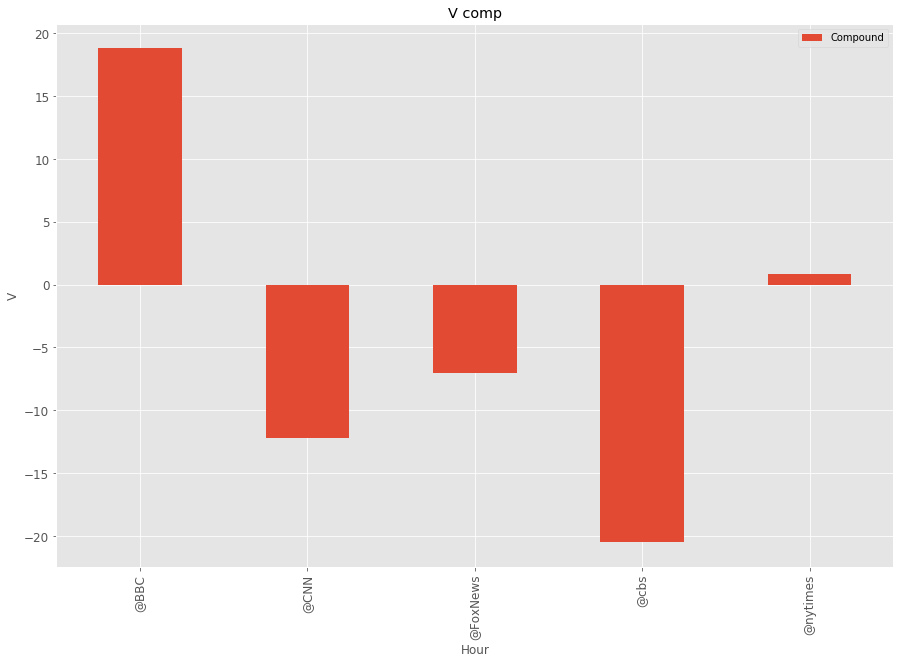

In [44]:
#aggregate sentiment scores
combined_agg = combined_sent_df.groupby(by=("Source"))["Compound"].sum()
combined_agg_df = pd.DataFrame.from_dict(combined_agg)
#plot results
ax = combined_agg_df [['Compound']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("V", fontsize=12)
plt.show()